# Bikeshare rides -- station classification (Winter 2018)
This notebook explores some ways of classifying stations using various usage parameters. 

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplleaflet
import pandas as pd
import numpy as np
import json
import math
from matplotlib import cm

#import os

#os.environ['PROJ_LIB'] = r'C:\Users\pgsze\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

from mpl_toolkits.basemap import Basemap

# Import, and set to log to the console.  (See the console which is running
# Jupyter notebook for logging about HTTP requests.)
#import tilemapbase
#tilemapbase.start_logging()

In [2]:
###
subs_df = pd.read_pickle('./data/pickledDFs/subs_df-NYC_Winter_2018.pkl')
stations_info_df = pd.read_pickle('./data/pickledDFs/stations_info_df-NYC_Winter_2018.pkl')
subs_trips_df = pd.read_pickle('./data/pickledDFs/subs_trips_df-NYC_Winter_2018.pkl')
###

In [ ]:
#Commented out, already saved in pickles that are read above
#winter_df_list = []
#
#for el in ['01','02','03']:
#    winter_df_list.append(pd.read_csv('./data/NYC/2018/2018{}-citibike-tripdata/2018{}-citibike-tripdata.csv'.format(el,el)))
#
##df = pd.read_csv('./data/NYC/2018/201806-citibike-tripdata/201806-citibike-tripdata.csv')
#winter_df_list[0].head()

In [ ]:
#winter_df = pd.concat(winter_df_list,ignore_index=True)#, keys = ['Jun', 'Jul', 'Aug'])
#winter_df.head()

In [3]:
#Number of weekend days and weekday days for Jan - March 2018
num_WE = 25
num_WD = 31+28+31-num_WE #Note I'm not subtracting holidays here, maybe later...

In [6]:
weekday_subs_trips_df = subs_trips_df[subs_trips_df['Trip_Type'] != 'Weekend'].copy()
weekend_subs_trips_df = subs_trips_df[subs_trips_df['Trip_Type'] == 'Weekend'].copy()

<IPython.core.display.Javascript object>


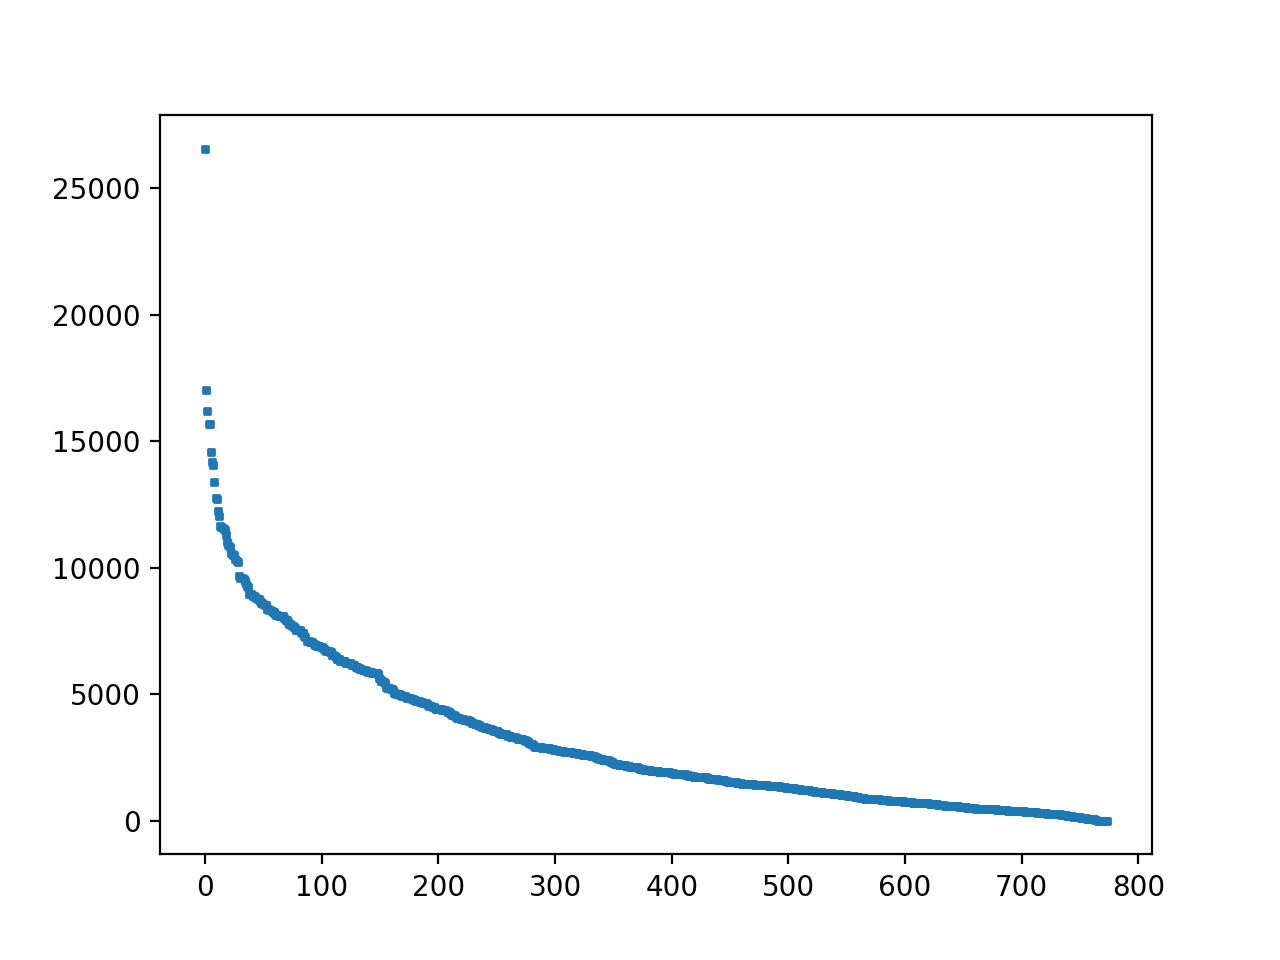

In [83]:
sorted_stations_df = subs_trips_df.groupby('start station id').count()['tripduration'].sort_values(ascending=False).reset_index()
sorted_stations_df.rename({'tripduration': 'total_trips'},axis=1,inplace=True)
sorted_stations_df['rank'] = sorted_stations_df.index
#sorted_stations_df['good']

fig = plt.figure()
ax = fig.gca()

ax.scatter(sorted_stations_df.index,sorted_stations_df['total_trips'],marker='s',s=5)

<IPython.core.display.Javascript object>


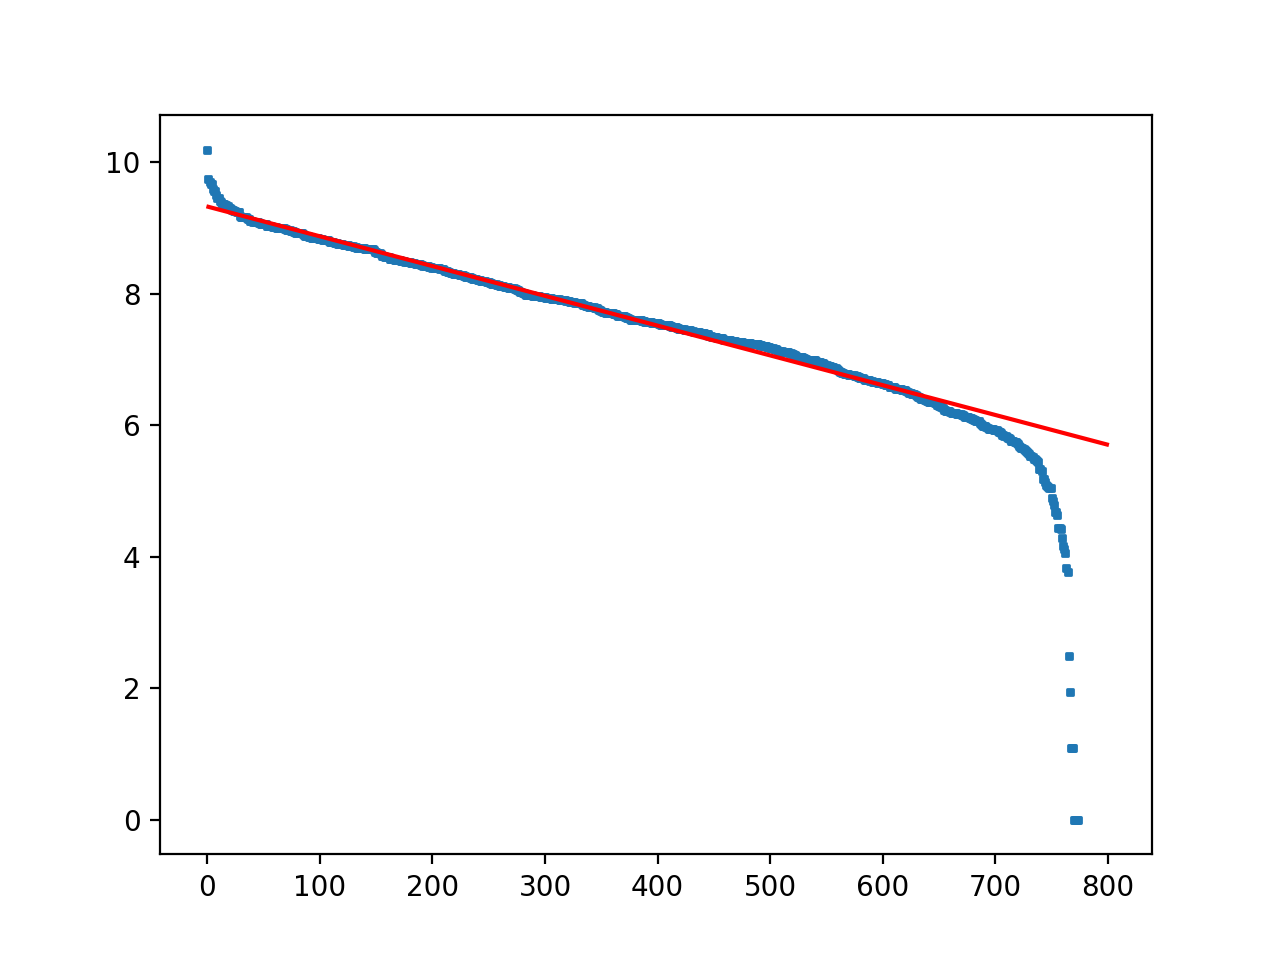

In [87]:
fit=np.polyfit(sorted_stations_df.index[100:700],np.log(sorted_stations_df['total_trips'][100:700]), 1)

fit_line = np.array(range(800))*fit[0]+np.full((1,800),fit[1])

fig = plt.figure()
ax = fig.gca()

#ax.scatter(range(800),fit_line)
ax.plot((1,799),(fit_line[0][1],fit_line[0][799]),color='red')
ax.scatter(sorted_stations_df.index,np.log(sorted_stations_df['total_trips']),marker='s',s=5)


In [88]:
hour_stations_gb = weekday_subs_trips_df.groupby(['pickup_hour','start station id'])
count_by_hour_station_df = hour_stations_gb.count()['tripduration'].rename('num_trips')
num_trips_df = count_by_hour_station_df.reset_index(level=0).pivot(columns='pickup_hour')
num_trips_df['total_trips'] = num_trips_df.sum(axis=1)

sorted_num_trips_df = num_trips_df.sort_values('total_trips',ascending=False).fillna(0)
sorted_num_trips_df.astype(int)

total = sorted_stations_df['total_trips'].sum()



<IPython.core.display.Javascript object>


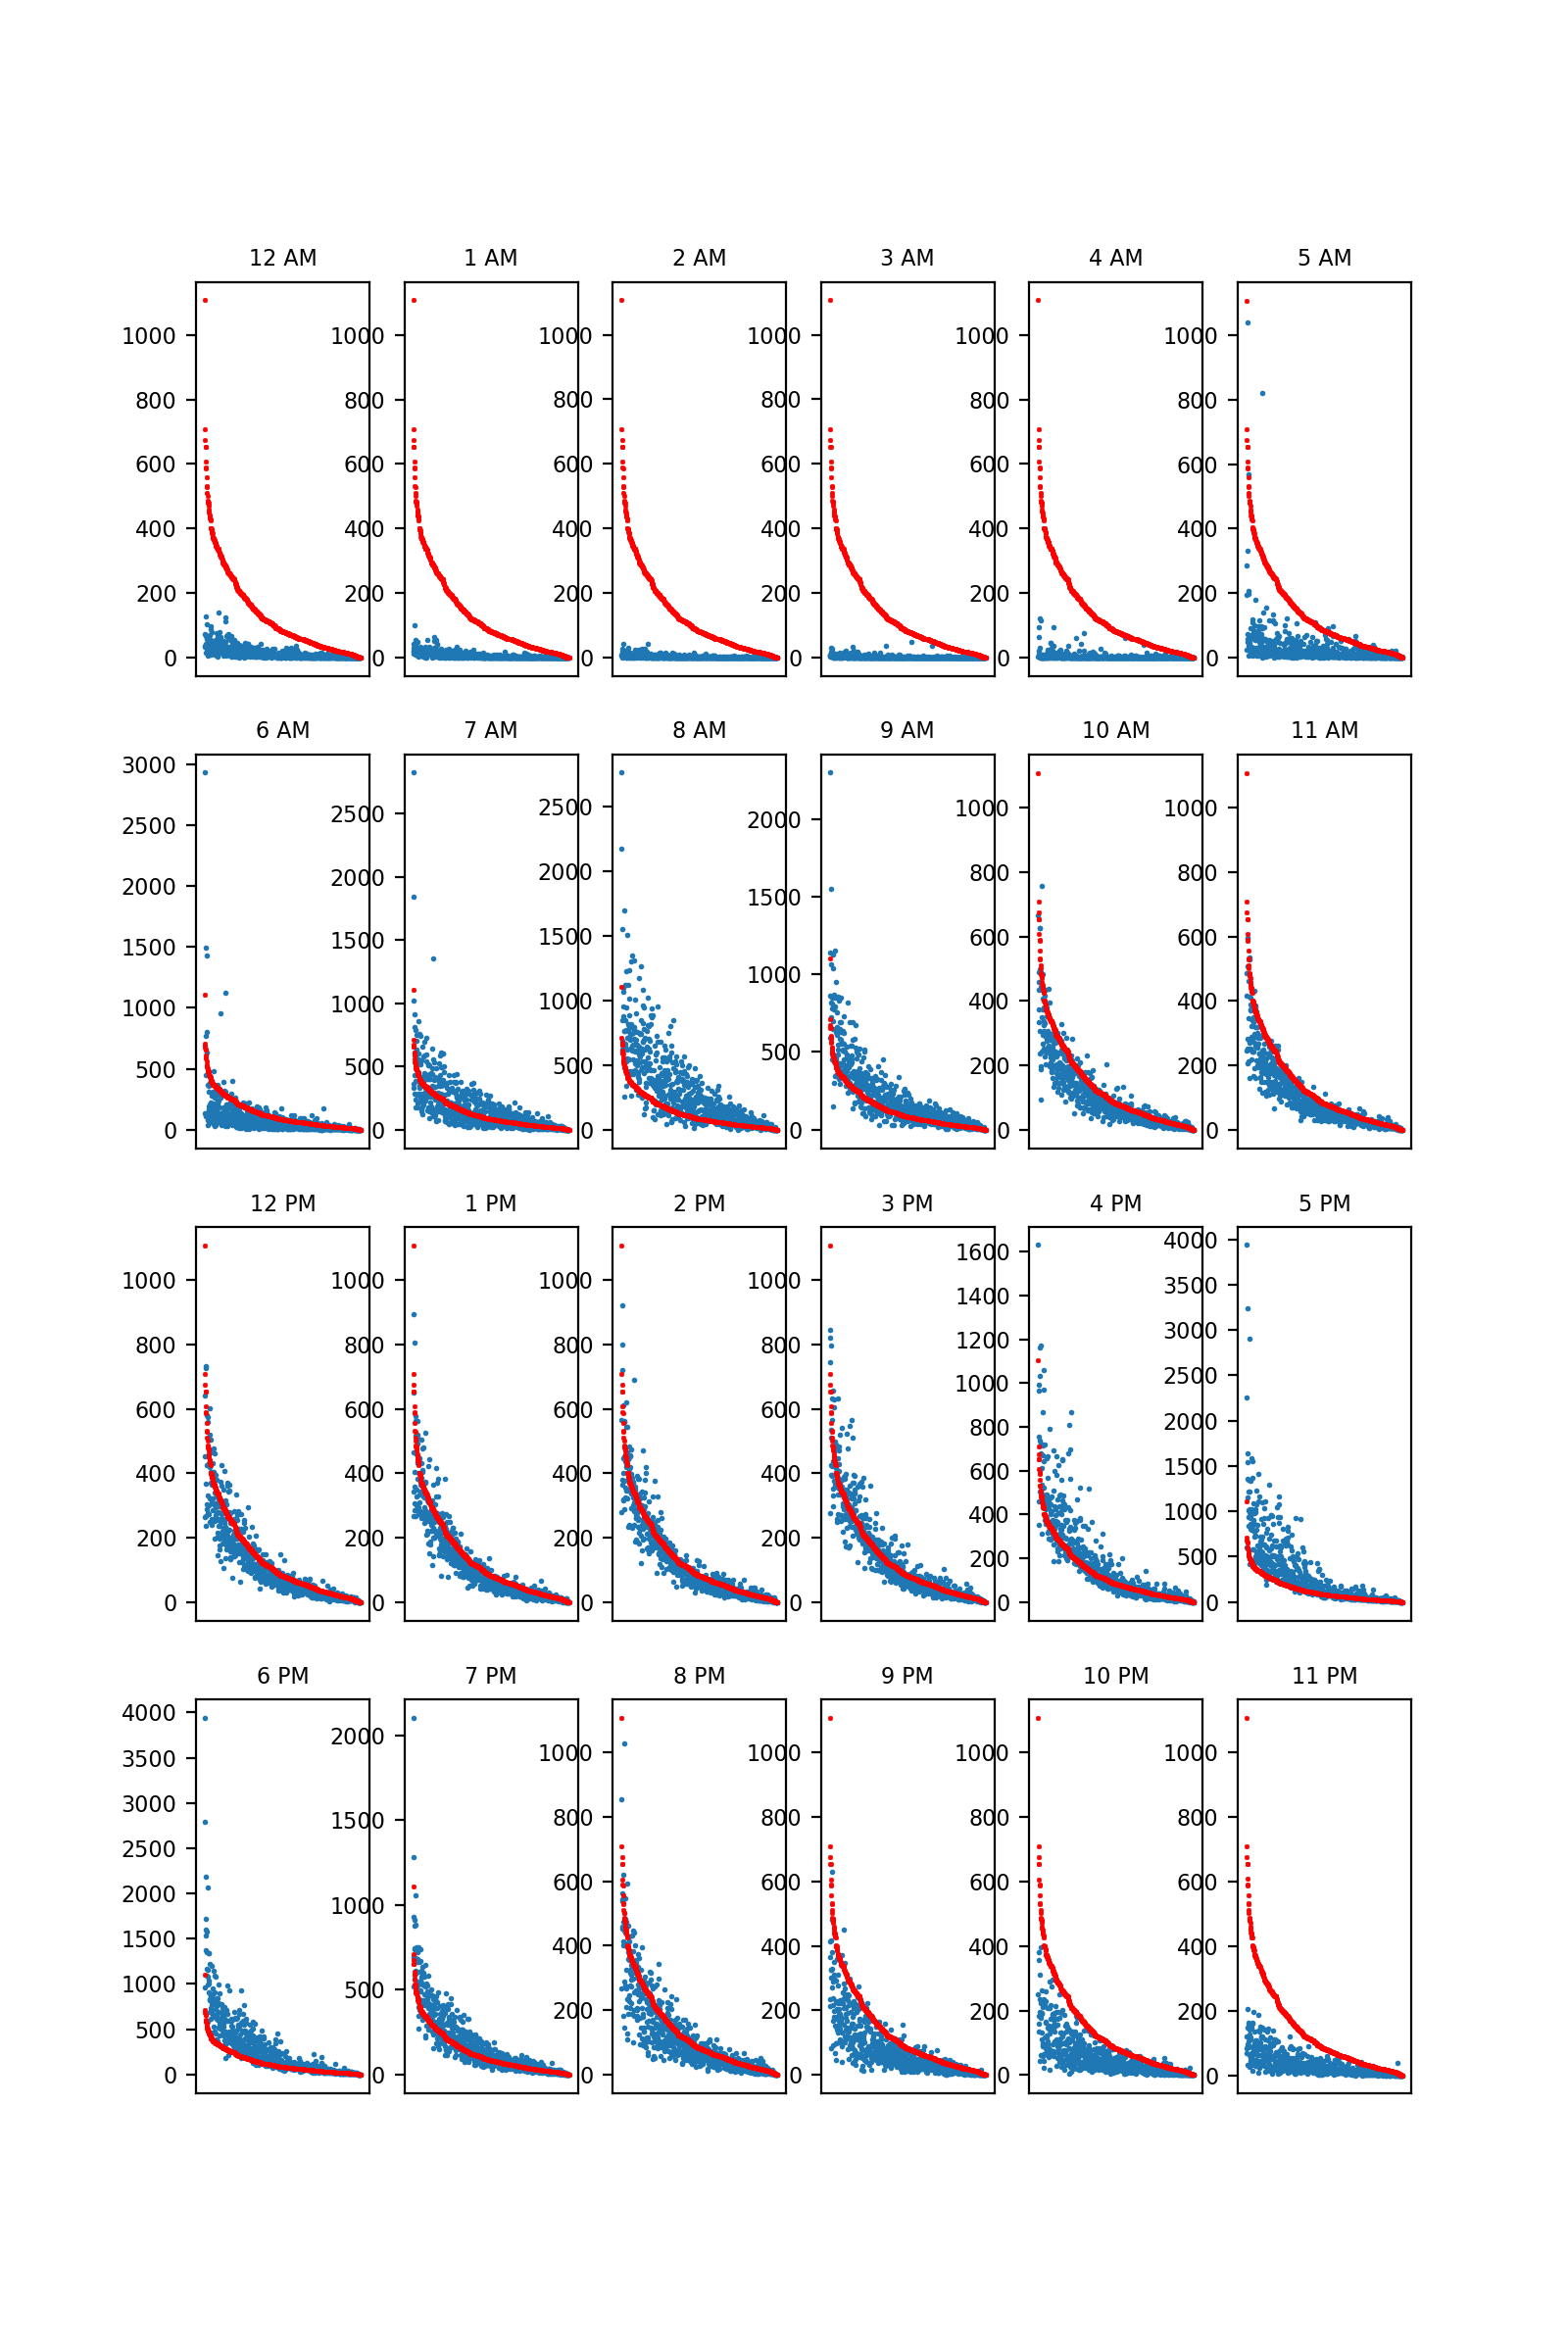

In [89]:
fig, ax = plt.subplots(nrows = 4, ncols = 6, figsize=(8,12))
ax = ax.flatten()

for num in range(24):
    
    if num == 0:
        ax[num].set_title('{} AM'.format(str(12)),fontsize = 8)
    elif num == 12:
        ax[num].set_title('{} PM'.format(str(12)),fontsize = 8)
    elif num < 12:
        ax[num].set_title('{} AM'.format(str(num % 12)),fontsize = 8)
    else:
        ax[num].set_title('{} PM'.format(str(num % 12)),fontsize = 8)

    #ax[num].set_title('hour = {}'.format(num),fontsize = 8)
    ax[num].scatter(range(len(sorted_num_trips_df.index)),sorted_num_trips_df['num_trips',num],s=1)
    ax[num].get_xaxis().set_visible(False)
    ax[num].tick_params(labelsize=8)
    weight = sorted_num_trips_df['num_trips',num].sum()
    #ax[num].scatter(sorted_stations_df.index,np.divide(np.array(sorted_stations_df['total_trips'])*weight,total),marker='s',color='red',s=1)
    ax[num].scatter(sorted_stations_df.index,np.divide(np.array(sorted_stations_df['total_trips']),24),marker='s',color='red',s=1)


<IPython.core.display.Javascript object>


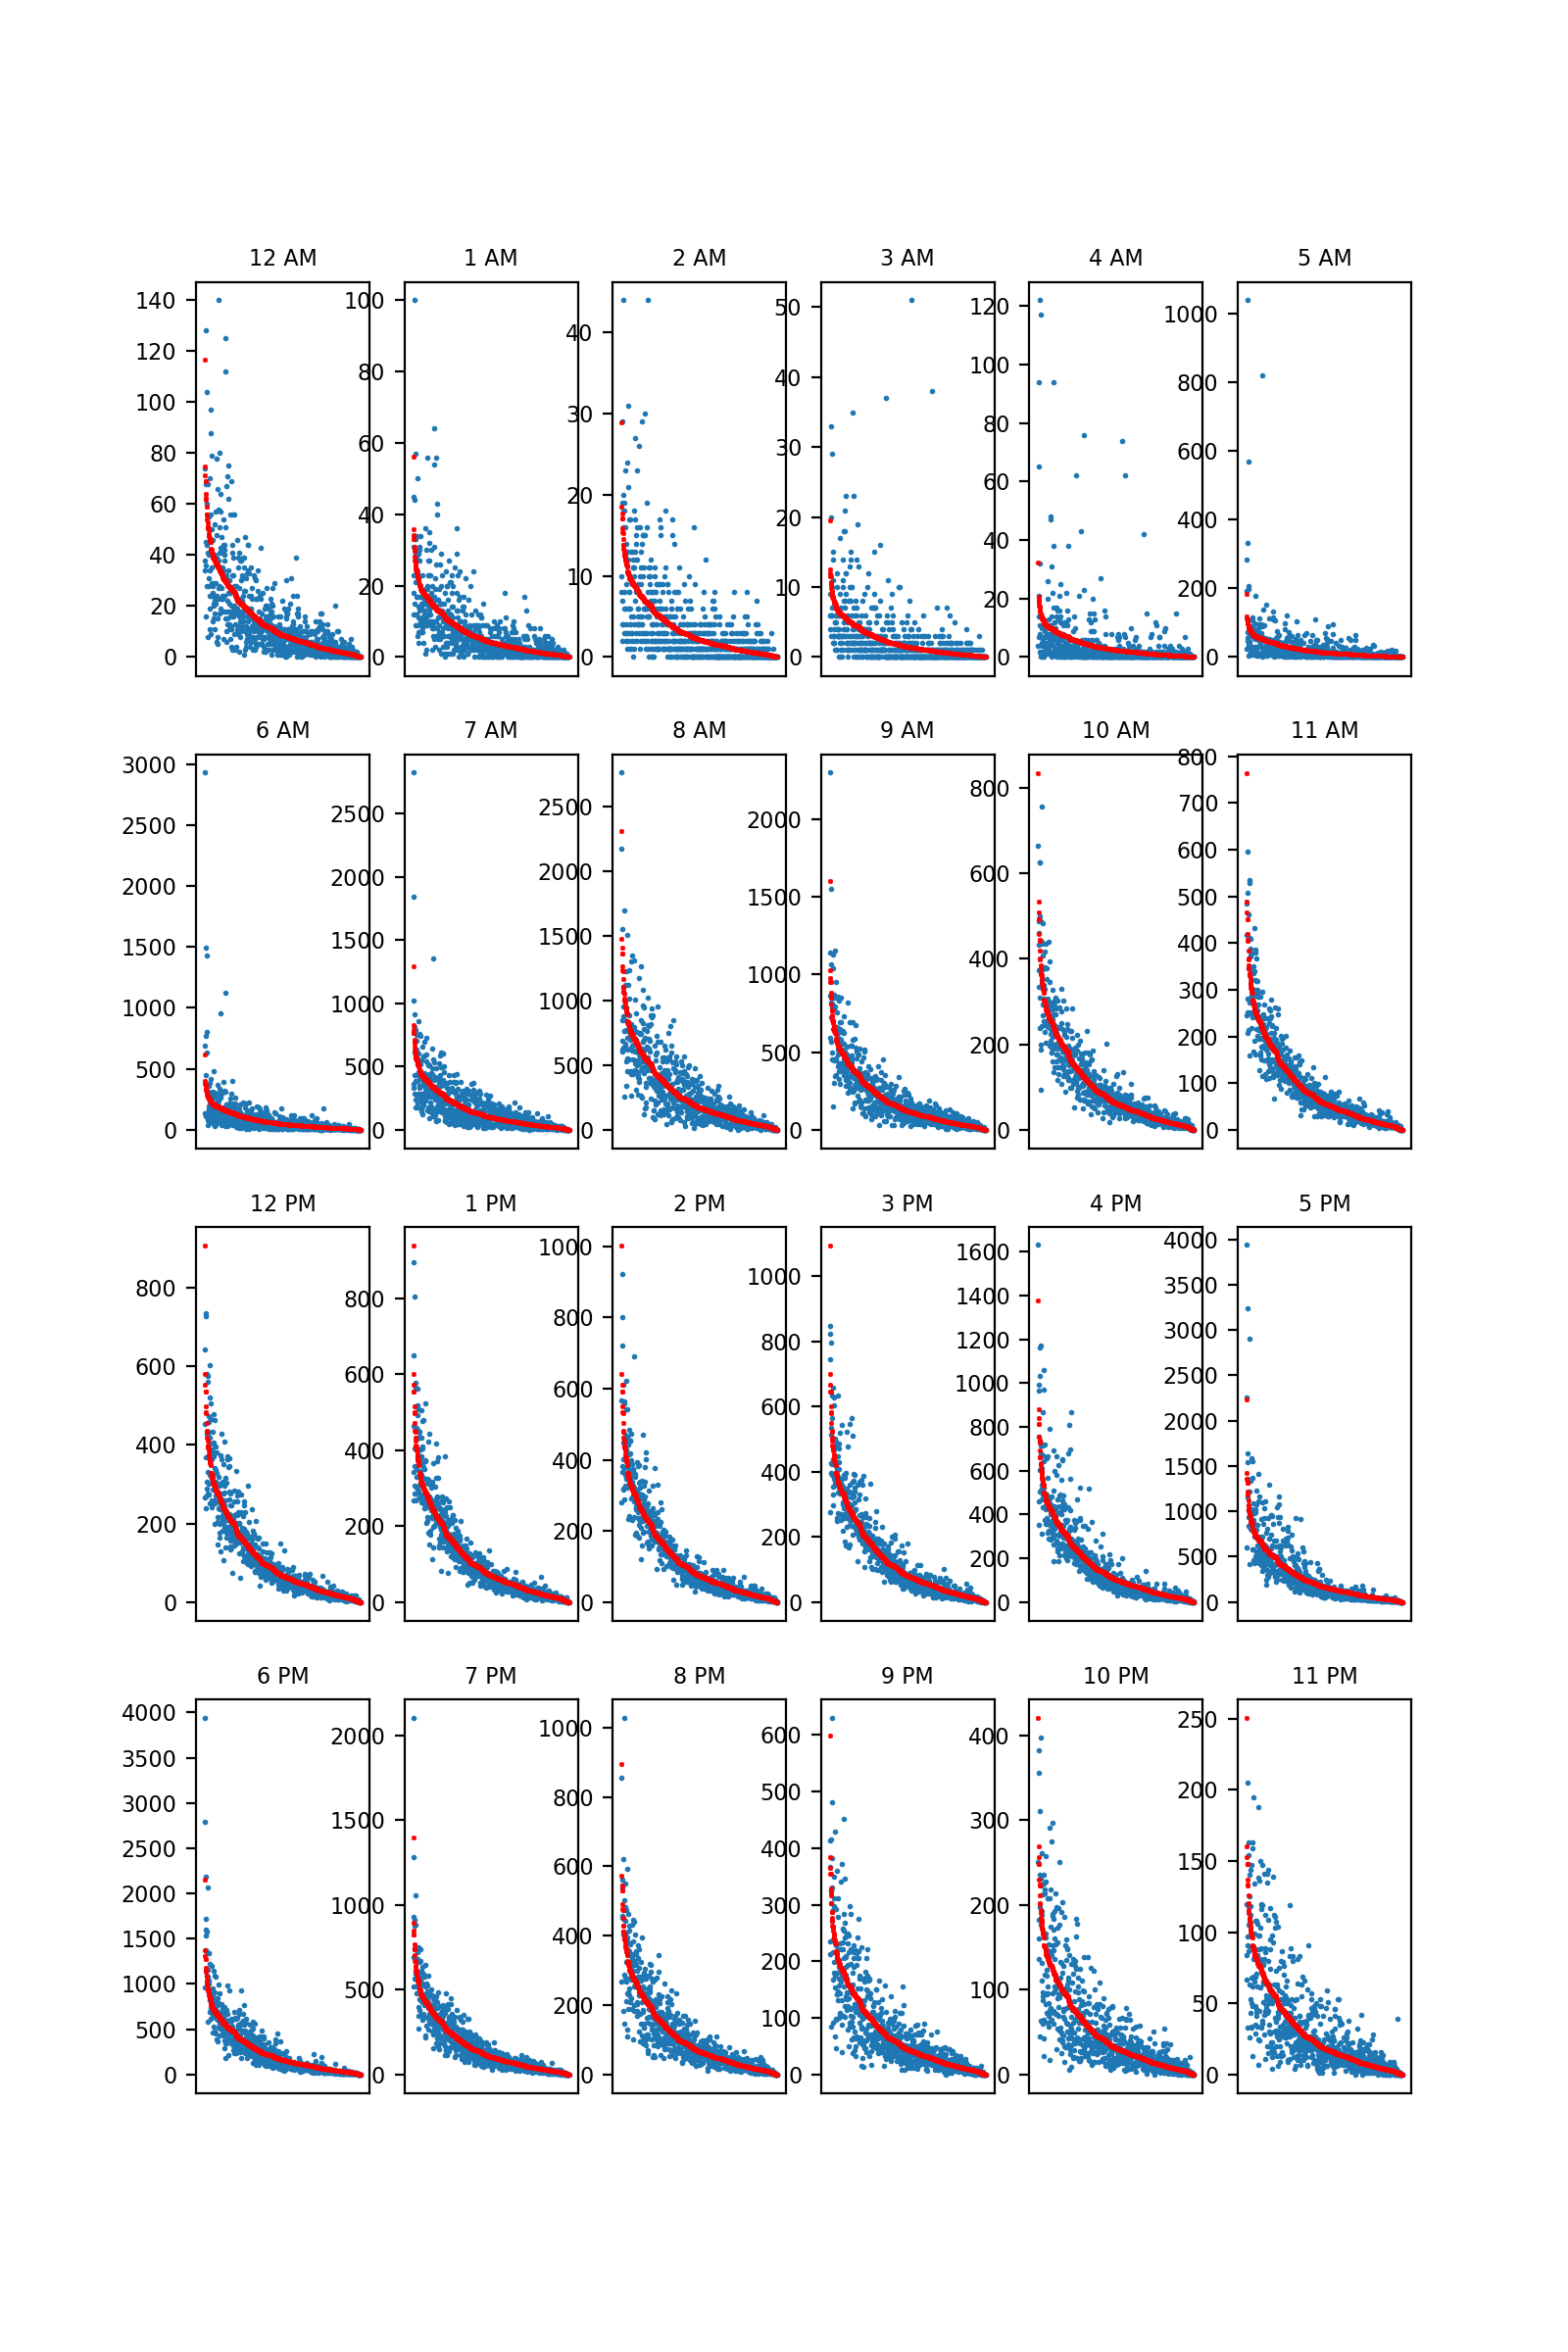

In [90]:
fig, ax = plt.subplots(nrows = 4, ncols = 6, figsize=(8,12))
ax = ax.flatten()

for num in range(24):
    
    if num == 0:
        ax[num].set_title('{} AM'.format(str(12)),fontsize = 8)
    elif num == 12:
        ax[num].set_title('{} PM'.format(str(12)),fontsize = 8)
    elif num < 12:
        ax[num].set_title('{} AM'.format(str(num % 12)),fontsize = 8)
    else:
        ax[num].set_title('{} PM'.format(str(num % 12)),fontsize = 8)

    #ax[num].set_title('hour = {}'.format(num),fontsize = 8)
    ax[num].scatter(range(len(sorted_num_trips_df.index)),sorted_num_trips_df['num_trips',num],s=1)
    ax[num].get_xaxis().set_visible(False)
    ax[num].tick_params(labelsize=8)
    weight = sorted_num_trips_df['num_trips',num].sum()
    ax[num].scatter(sorted_stations_df.index,np.divide(np.array(sorted_stations_df['total_trips'])*weight,total),marker='s',color='red',s=1)
    #ax[num].scatter(sorted_stations_df.index,np.divide(np.array(sorted_stations_df['total_trips']),24),marker='s',color='red',s=1)


<IPython.core.display.Javascript object>


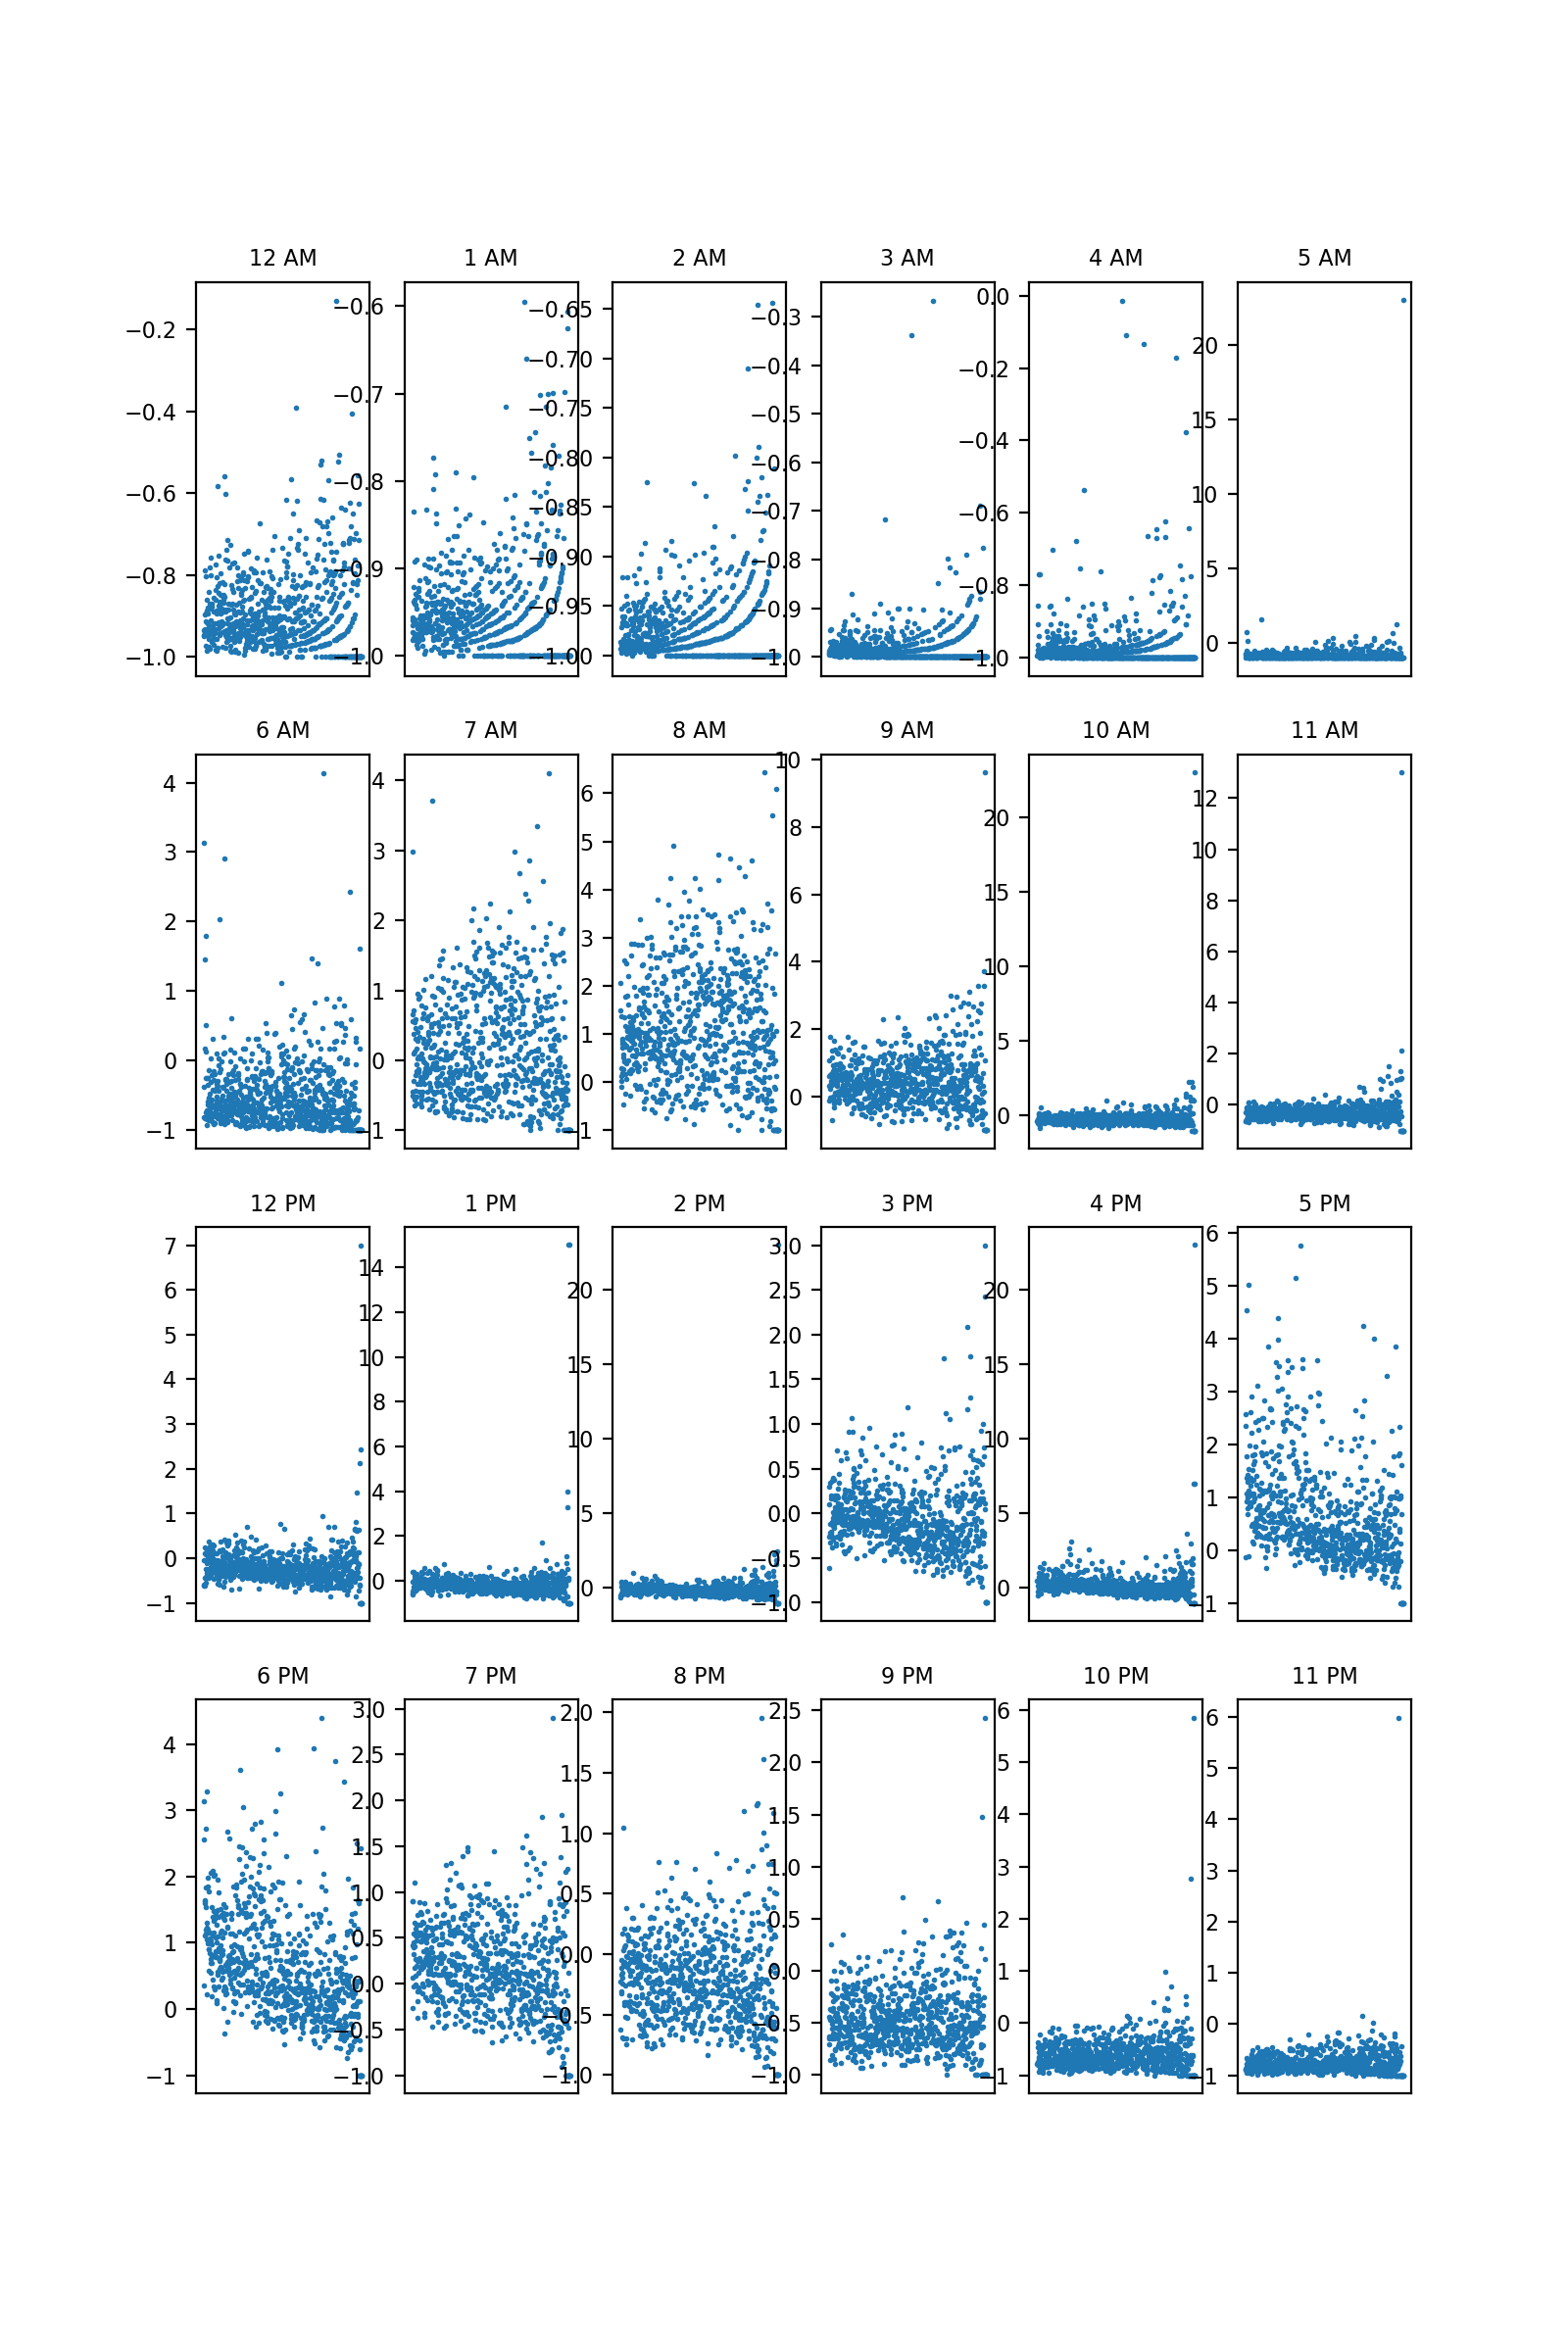

In [91]:

fig, ax = plt.subplots(nrows = 4, ncols = 6, figsize=(8,12))
ax = ax.flatten()

for num in range(24):
    
    if num == 0:
        ax[num].set_title('{} AM'.format(str(12)),fontsize = 8)
    elif num == 12:
        ax[num].set_title('{} PM'.format(str(12)),fontsize = 8)
    elif num < 12:
        ax[num].set_title('{} AM'.format(str(num % 12)),fontsize = 8)
    else:
        ax[num].set_title('{} PM'.format(str(num % 12)),fontsize = 8)
    
    #ax[num].set_title('hour = {}'.format(num),fontsize = 8)
   
    weight = sorted_num_trips_df['num_trips',num].sum()
    normalized = np.divide(np.array(sorted_stations_df['total_trips'])*weight,total)
    
    diff_score = np.divide(sorted_num_trips_df['num_trips',num].values - normalized,normalized)
    
    average =  np.divide(np.array(sorted_stations_df['total_trips']),24)
    diff_score_2 = np.divide(sorted_num_trips_df['num_trips',num].values -average,average)
    
    #diff = sorted_num_trips_df['num_trips',num].values - normalized
    ax[num].scatter(range(len(sorted_num_trips_df.index)),diff_score_2,s=1)
    ax[num].get_xaxis().set_visible(False)
    ax[num].tick_params(labelsize=8)
    
    

In [92]:
for num in range(24):
    weight = sorted_num_trips_df['num_trips',num].sum()
    normalized = np.divide(np.array(sorted_stations_df['total_trips'])*weight,total)
    diff_score = np.divide(sorted_num_trips_df['num_trips',num].values - normalized,normalized)
    #diff_score = np.divide(sorted_num_trips_df['num_trips',num].values - normalized,sorted_num_trips_df['num_trips',num].values)
    
    average =  np.divide(np.array(sorted_stations_df['total_trips']),24)
    diff_score_2 = np.divide(sorted_num_trips_df['num_trips',num].values -average,average)
    
    sorted_num_trips_df['diff',num] = sorted_num_trips_df['num_trips',num].values - normalized
    sorted_num_trips_df['diff_score',num] = diff_score
    sorted_num_trips_df['diff_score_2',num] = diff_score_2

sorted_num_trips_df['max_diff'] = sorted_num_trips_df['diff'].max(axis=1) 
sorted_num_trips_df['max_diff_time'] = sorted_num_trips_df['diff'].idxmax(axis=1)  

sorted_num_trips_df['max_trips_time'] = sorted_num_trips_df['num_trips'].idxmax(axis=1)

sorted_num_trips_df['max_diff_score'] = sorted_num_trips_df['diff_score'].max(axis=1)  
sorted_num_trips_df['max_diff_score_time'] = sorted_num_trips_df['diff_score'].idxmax(axis=1)  

sorted_num_trips_df['max_diff_score_2'] = sorted_num_trips_df['diff_score_2'].max(axis=1)  
sorted_num_trips_df['max_diff_score_2_time'] = sorted_num_trips_df['diff_score_2'].idxmax(axis=1)  

sorted_num_trips_df['late_night_score'] = sorted_num_trips_df['diff_score',0]
for num in [1,2,3,4,20,21,22,23]:
    sorted_num_trips_df['late_night_score'] += sorted_num_trips_df['diff_score',num]
sorted_num_trips_df['late_night_score'] = sorted_num_trips_df['late_night_score']/len([0,1,2,3,4,20,21,22,23])
    
sorted_num_trips_df['commuter_score'] = sorted_num_trips_df['diff_score',5]
for num in [7,8,9,16,17,18,19]:
    sorted_num_trips_df['commuter_score'] += sorted_num_trips_df['diff_score',num]
sorted_num_trips_df['commuter_score'] = sorted_num_trips_df['commuter_score']/len([5,6,7,8,9,16,17,18,19])

sorted_num_trips_df['midday_score'] = sorted_num_trips_df['diff_score',10]
for num in [11,12,13,14,15]:
    sorted_num_trips_df['midday_score']+=sorted_num_trips_df['diff_score',num]
sorted_num_trips_df['midday_score'] = sorted_num_trips_df['midday_score']/len([10,11,12,13,14,15])


pd.set_option('display.max_columns', None)


sorted_num_trips_df = sorted_num_trips_df.assign(Type =
    np.select(
        condlist=[sorted_num_trips_df['max_diff_score_time'] < 5, sorted_num_trips_df['max_diff_score_time'] <10, sorted_num_trips_df['max_diff_score_time']< 16, sorted_num_trips_df['max_diff_score_time'] <20, sorted_num_trips_df['max_diff_score_time'] < 24], 
        choicelist=['Late Night','Commuter','Midday','Commuter','Late Night'], 
        default='Other'))

#sorted_num_trips_df[['diff_score_2','max_diff_time','max_diff_score_time','max_trips_time','max_diff_score_2_time']]

type_scores=sorted_num_trips_df[['late_night_score', 'commuter_score', 'midday_score']]

sorted_num_trips_df = sorted_num_trips_df.assign(Type2 =
    np.select(
        condlist=[type_scores.idxmax(axis=1) == ('late_night_score',''),type_scores.idxmax(axis=1) == ('commuter_score',''),type_scores.idxmax(axis=1) == ('midday_score','')], 
        choicelist=['Late Night','Commuter','Midday'], 
        default='Other'))

sorted_num_trips_df[['num_trips','Type','Type2']]
#type_scores.idxmax(axis=1)

num_trips                                                    \
pickup_hour              0      1     2     3      4       5       6       7   
start station id                                                               
519                   74.0   45.0   8.0   6.0    4.0   284.0   692.0  1839.0   
3255                  38.0   31.0  10.0   6.0   65.0   194.0  2935.0  2823.0   
402                   34.0   18.0   7.0   9.0    7.0    23.0   132.0   332.0   
435                   45.0   12.0   2.0   4.0   14.0    48.0   118.0   361.0   
490                   68.0   23.0  19.0  20.0   94.0   332.0   773.0  1017.0   
477                  128.0  100.0  29.0  33.0   21.0  1040.0  1494.0   427.0   
497                   36.0   12.0   4.0   6.0   11.0    55.0   111.0   282.0   
359                   16.0   15.0   4.0   3.0    2.0    72.0   444.0   808.0   
523                   60.0   44.0  44.0   9.0   32.0   206.0   635.0   612.0   
379                   28.0   33.0  18.0   7.0  122.0   197.0   800.0   913.0   
285                  104.0   57.0  16.0   6.0    8.0    36.0   135.0   236.0   
492                   44.0   33.0  20.0  29.0  117.0   569.0  1427.0   788.0   
459                   55.0   21.0   3.0   6.0    0.0     4.0    95.0   568.0   
293                   68.0   29.0   8.0  10.0    1.0    45.0    79.0   174.0   
3443                   8.0    9.0   6.0   2.0    1.0     8.0    40.0   381.0   
537                   41.0   12.0  18.0   3.0    7.0    36.0   140.0   274.0   
432                   55.0   28.0  19.0  14.0    1.0    63.0   364.0   699.0   
465                   40.0   34.0   6.0  11.0    4.0    23.0   314.0   629.0   
505                   50.0   17.0  16.0  15.0   10.0    91.0   356.0   745.0   
229                   31.0    6.0   3.0   3.0    1.0     8.0   190.0   433.0   
3263                  55.0   50.0  23.0   2.0    5.0    30.0   169.0   386.0   
168                   28.0   17.0   2.0   3.0    6.0    17.0   105.0   173.0   
284                   70.0   24.0  14.0   2.0   10.0    11.0   205.0   518.0   
3641                  24.0    9.0   4.0   4.0    1.0     9.0    63.0   209.0   
472                   19.0    7.0   9.0   5.0    0.0    61.0   199.0   451.0   
358                   34.0   14.0   2.0   5.0    2.0    68.0   380.0   856.0   
517                   11.0   11.0   3.0   1.0    2.0    60.0   157.0   551.0   
382                   56.0   29.0  13.0   7.0    7.0    31.0    82.0   283.0   
3233                   9.0    4.0   1.0   1.0    0.0   107.0   222.0   598.0   
499                   88.0   30.0  13.0   7.0    2.0    17.0   163.0   333.0   
...                    ...    ...   ...   ...    ...     ...     ...     ...   
3395                   0.0    0.0   0.0   0.0    0.0     0.0     9.0    13.0   
3661                   0.0    0.0   0.0   0.0    0.0     2.0     9.0     9.0   
3492                   2.0    2.0   0.0   0.0    0.0     2.0     1.0     3.0   
3674                   1.0    0.0   0.0   0.0    0.0     0.0     1.0     6.0   
3564                   0.0    0.0   0.0   0.0    0.0     1.0     1.0     0.0   
3631                   0.0    0.0   0.0   0.0    0.0     0.0     0.0     3.0   
3468                   1.0    0.0   0.0   0.0    0.0     0.0     0.0     0.0   
3590                   1.0    0.0   1.0   0.0    0.0     0.0     1.0     2.0   
3330                   0.0    0.0   0.0   0.0    0.0     0.0     0.0     3.0   
3559                   2.0    0.0   0.0   0.0    0.0     3.0     0.0     2.0   
3554                   1.0    0.0   0.0   1.0    1.0     0.0     0.0     3.0   
3620                   0.0    0.0   0.0   0.0    0.0     0.0     0.0     0.0   
3596                   0.0    0.0   0.0   0.0    0.0     0.0     0.0     2.0   
3333                   1.0    0.0   0.0   0.0    0.0     1.0     1.0     2.0   
3557                   0.0    0.0   0.0   0.0    0.0     0.0     0.0     2.0   
3239                   0.0    0.0   0.0   0.0    0.0     0.0     0.0     0.0   
3299             